#### Import Module

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [2]:
data = pd.read_csv('../../selected_data/2_content_bold_img/kpca_512.csv')
data

,id,KernelPCA_1,KernelPCA_2,KernelPCA_3,KernelPCA_4,KernelPCA_5,KernelPCA_6,KernelPCA_7,KernelPCA_8,KernelPCA_9,...,KernelPCA_504,KernelPCA_505,KernelPCA_506,KernelPCA_507,KernelPCA_508,KernelPCA_509,KernelPCA_510,KernelPCA_511,KernelPCA_512,success_x
0,NMN2,-0.098025,0.002477,0.256514,0.009081,-0.025274,-0.013754,-0.070997,-0.040938,0.015650,...,0.000384,-0.000841,0.009143,0.005969,0.012618,0.026253,-0.006461,0.002512,0.016694,1
1,ZENLET-The-Dual,-0.147939,0.103284,-0.095399,0.030996,-0.014491,-0.027488,-0.016252,0.041242,-0.024747,...,-0.017768,0.013854,-0.044548,0.002920,0.011219,-0.009413,-0.034204,0.018577,0.007781,1
2,hhl-penzhai,-0.045250,-0.005336,0.016200,-0.020041,-0.027199,0.054613,-0.006646,-0.057256,-0.062150,...,-0.002570,0.005700,0.004137,0.039367,-0.002443,0.035617,0.009910,0.002831,0.054738,1
3,scion-36,-0.153100,0.096169,-0.021569,0.080907,0.051220,0.042754,0.026135,-0.042618,-0.010810,...,0.016931,-0.015822,0.013994,0.001329,-0.016995,-0.032951,-0.015932,0.000113,-0.017532,1
4,amt-cube,-0.082351,0.026766,-0.063782,0.116280,-0.053391,0.070443,-0.022650,0.028596,-0.005247,...,-0.025023,0.046600,-0.004025,-0.009800,-0.000185,0.010682,0.025948,0.011393,0.006778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5443,ryanxpkking,0.071405,-0.094615,-0.015961,-0.029048,-0.013219,-0.018772,0.010675,-0.009050,-0.083551,...,-0.030375,0.004442,-0.052102,-0.001916,-0.002205,0.012010,-0.000699,0.040321,-0.013124,0
5444,groundzero1,0.148427,-0.206858,-0.118448,0.112681,-0.158513,-0.082178,-0.025483,-0.014131,0.268035,...,-0.030229,-0.029660,-0.007841,0.004716,-0.024965,0.011240,-0.009172,-0.028342,0.007576,0
5445,rogerspace,0.125892,-0.171074,-0.048354,-0.016080,-0.060405,-0.048643,-0.034524,-0.017113,-0.011603,...,0.004863,0.004046,-0.020416,0.021684,-0.003152,-0.031439,0.017492,0.023921,-0.021227,0
5446,holidayy2013,0.087628,-0.095311,0.012045,0.010395,0.014517,-0.055285,0.015051,-0.012788,-0.009422,...,-0.066773,-0.031095,-0.042043,-0.007697,-0.076069,0.009143,-0.005462,0.068487,0.019173,0


In [3]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4204
0    1244
Name: count, dtype: int64

In [4]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.67
Recall: 0.69
Precision: 0.86
F1-Score: 0.76
F0.5-Score: 0.82
F0.3-Score: 0.84


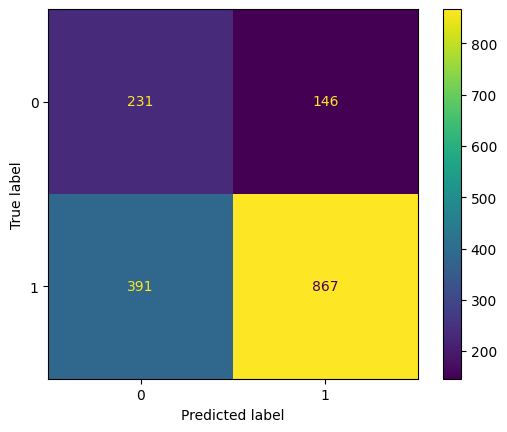

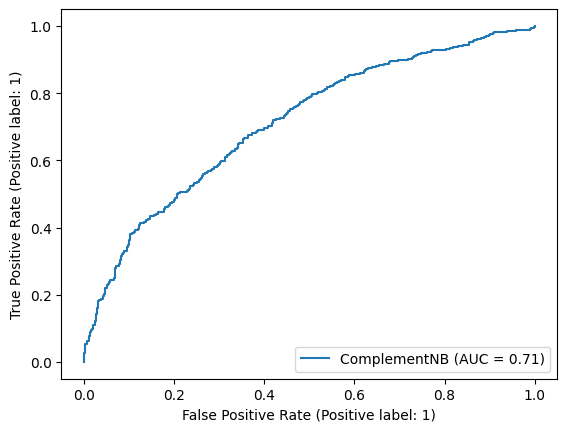

In [5]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 1.0
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.79


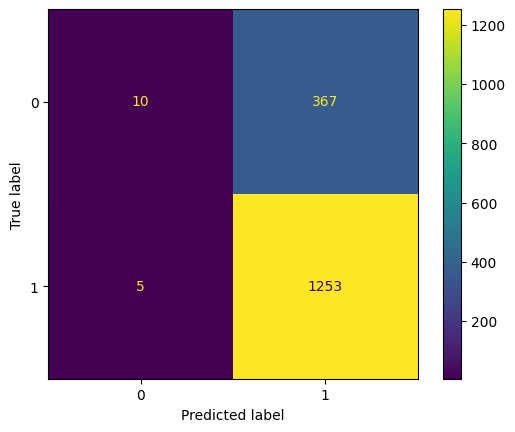

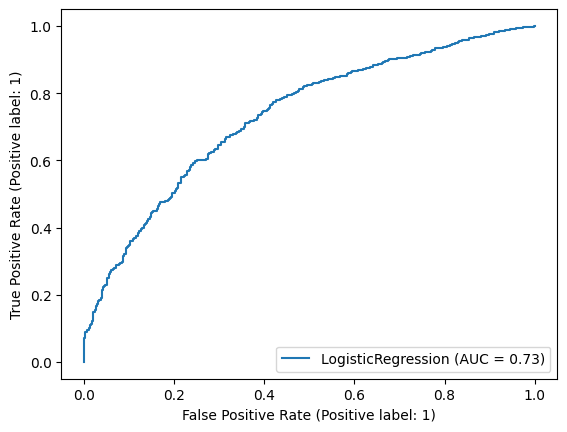

---- Under Sample Data ----
Accuracy: 0.65
Recall: 0.63
Precision: 0.88
F1-Score: 0.73
F0.5-Score: 0.81
F0.3-Score: 0.85


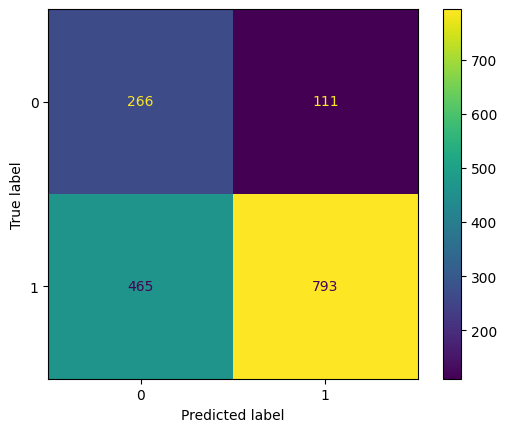

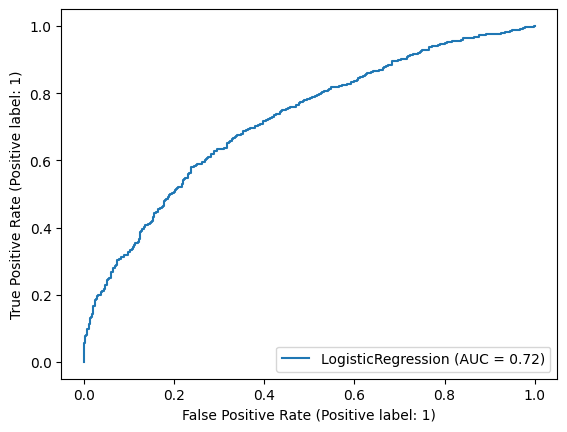

---- Over Sample Data ----
Accuracy: 0.68
Recall: 0.7
Precision: 0.86
F1-Score: 0.77
F0.5-Score: 0.82
F0.3-Score: 0.84


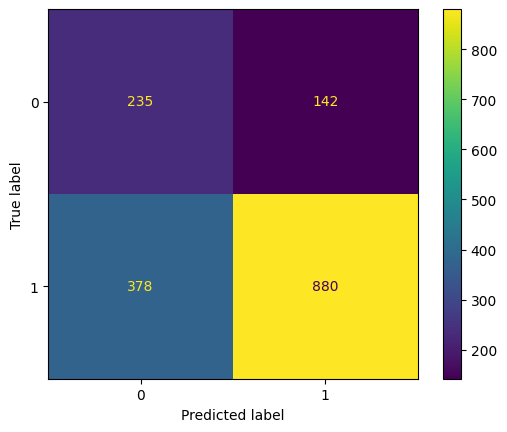

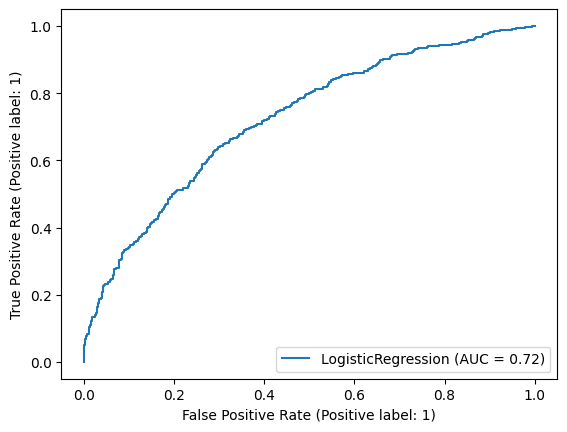

In [6]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 0.99
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.79


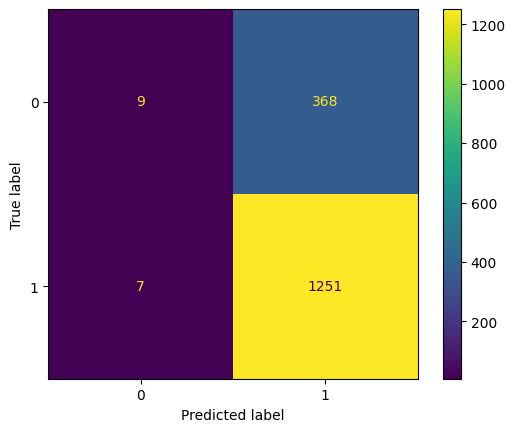

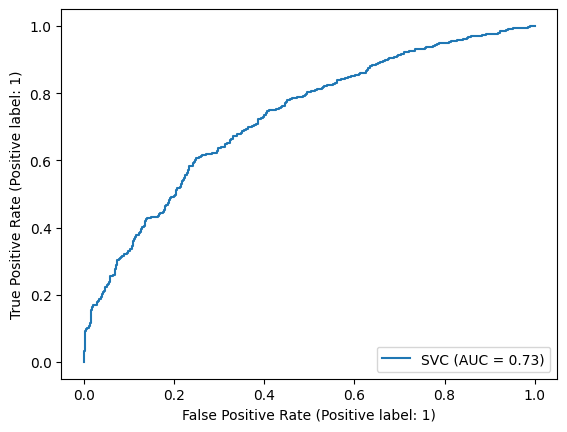

---- Under Sample Data ----
Accuracy: 0.65
Recall: 0.65
Precision: 0.87
F1-Score: 0.74
F0.5-Score: 0.81
F0.3-Score: 0.84


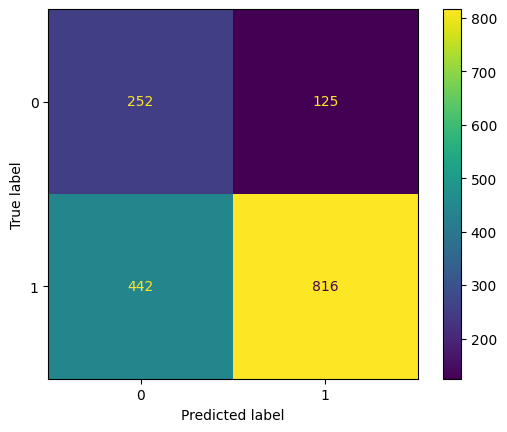

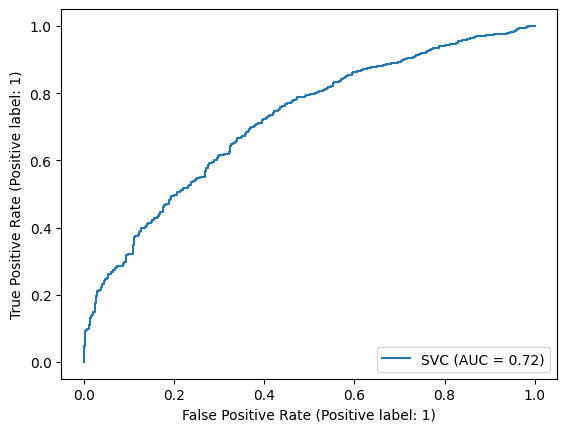

---- Over Sample Data ----
Accuracy: 0.74
Recall: 0.84
Precision: 0.83
F1-Score: 0.84
F0.5-Score: 0.83
F0.3-Score: 0.83


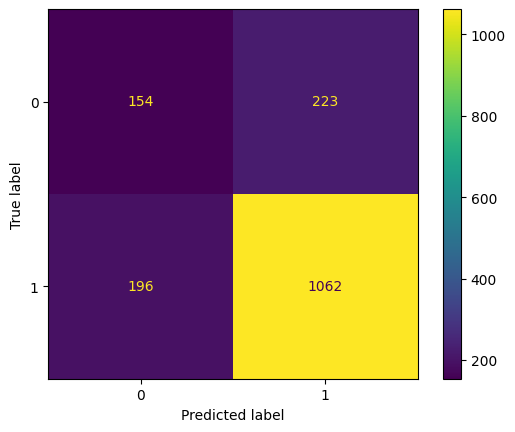

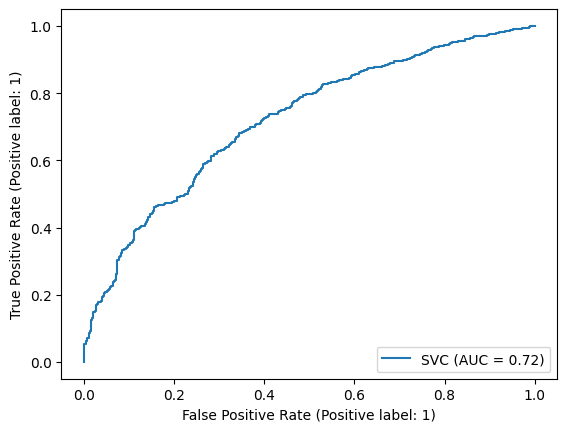

In [7]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 1.0
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.78


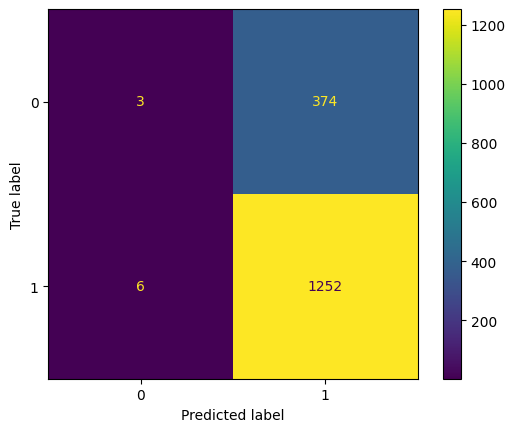

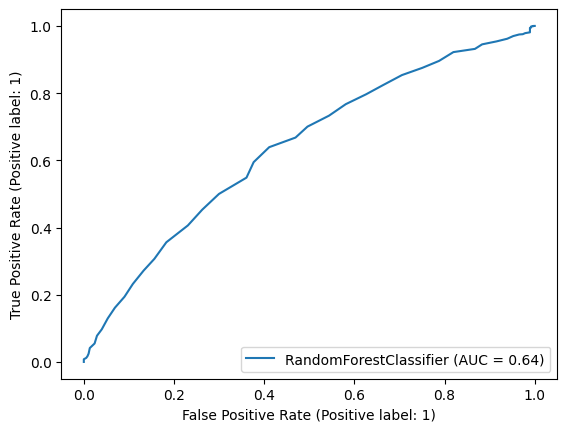

---- Under Sample Data ----
Accuracy: 0.59
Recall: 0.58
Precision: 0.84
F1-Score: 0.69
F0.5-Score: 0.77
F0.3-Score: 0.81


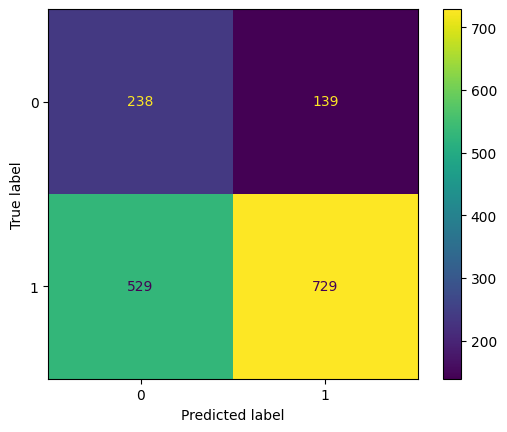

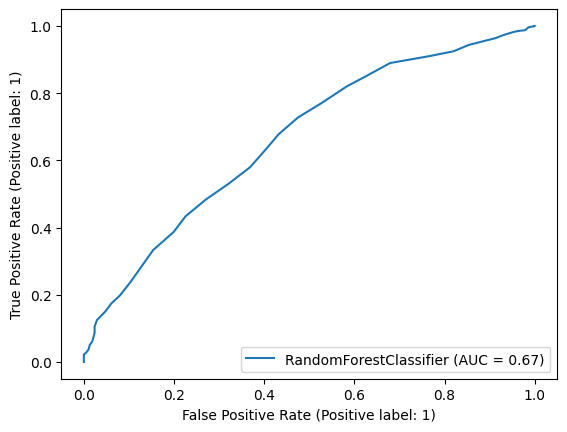

---- Over Sample Data ----
Accuracy: 0.77
Recall: 0.99
Precision: 0.77
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.79


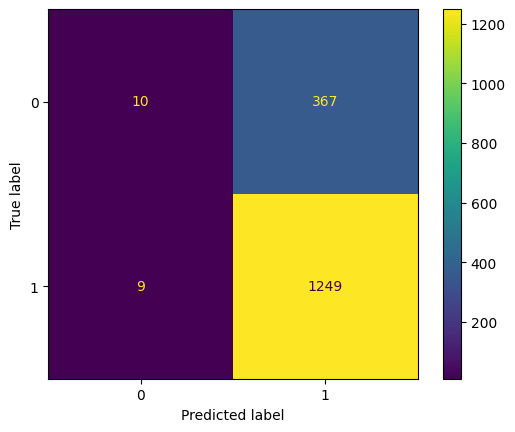

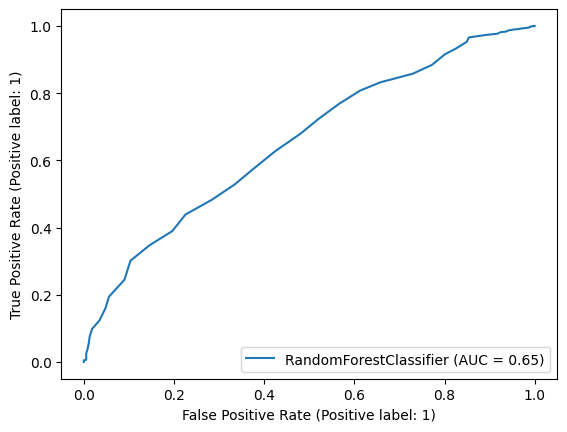

In [8]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.77
Recall: 0.99
Precision: 0.78
F1-Score: 0.87
F0.5-Score: 0.81
F0.3-Score: 0.79


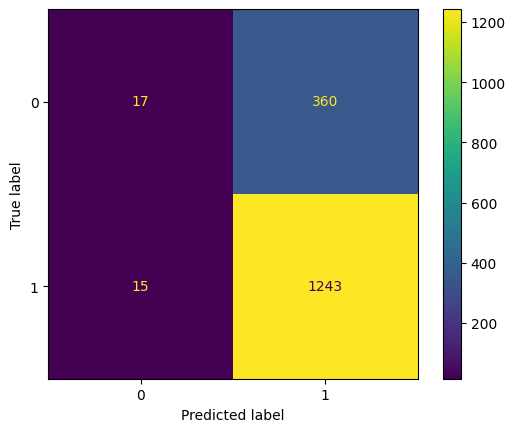

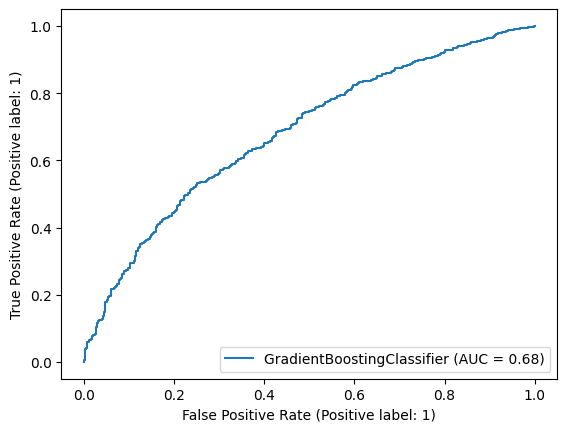

---- Under Sample Data ----
Accuracy: 0.61
Recall: 0.6
Precision: 0.84
F1-Score: 0.7
F0.5-Score: 0.78
F0.3-Score: 0.81


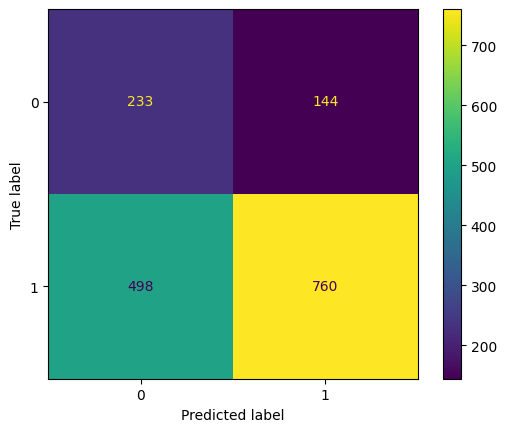

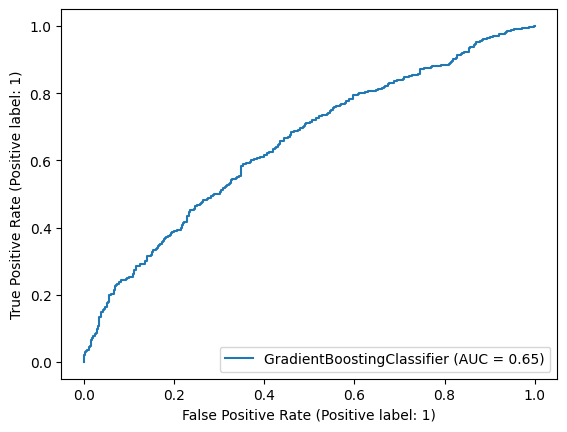

---- Over Sample Data ----
Accuracy: 0.71
Recall: 0.79
Precision: 0.83
F1-Score: 0.81
F0.5-Score: 0.82
F0.3-Score: 0.83


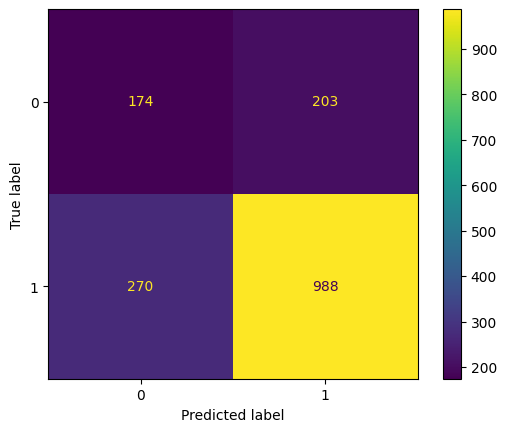

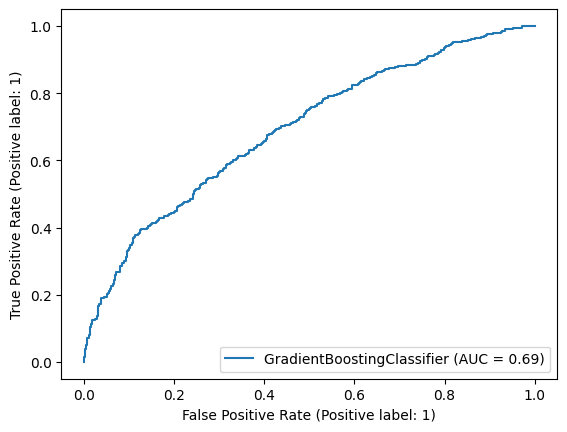

In [9]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
